In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regionsf
%matplotlib inline

# SVM - IRIS dataset

In [41]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [42]:
# If you haven't installed mlxtend yet for ipython
# !conda install -c rasbt mlxtend -qy

## Example of Hard Margin SVM

In [47]:
hard_svm = SVC(C=1e100,kernel='linear')
hard_svm.fit(X, y)

SVC(C=1e+100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Rendering from [this](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)

In [49]:
def plot_svm(clf, X, Y, title='SVM'):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    print('Support Vectors: %s' % hard_svm.support_vectors_)

    plt.title('Hard SVM')
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.axis('tight')
    plt.show()

Support Vectors: [[ 4.8  1.9]
 [ 5.1  1.9]
 [ 5.1  3. ]]


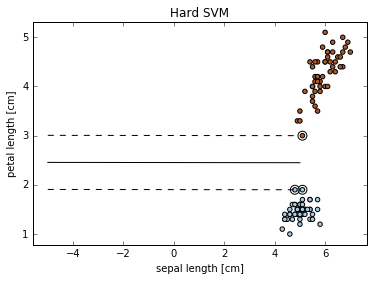

In [51]:
plot_svm(hard_svm, X, y)

## Jin's Rendering

Support Vectors: [[ 4.8  1.9]
 [ 5.1  1.9]
 [ 4.9  3.3]
 [ 5.1  3. ]]


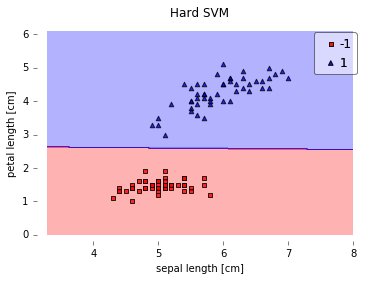

In [37]:
print('Support Vectors: %s' % hard_svm.support_vectors_)
plot_decision_regions(X, y, clf=hard_svm)
plt.title('Hard SVM')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.axis('tight')
plt.show()

# # plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
# plt.xlabel('Iterations')
# plt.ylabel('Missclassifications')
# plt.show()

## Soft-Margin SVM

In [52]:
soft_svm = SVC(C=1,kernel='linear')
soft_svm.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Support Vectors: [[ 4.8  1.9]
 [ 5.1  1.9]
 [ 5.1  3. ]]


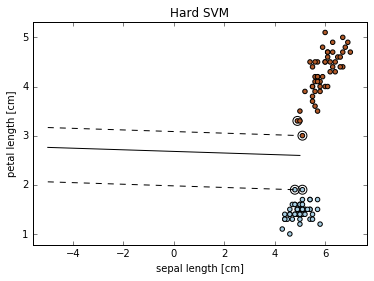

In [53]:
plot_svm(soft_svm, X, y)